# Thinning datasets 

This function is used to thin a dataset by keeping every n-th value across the dimensions that are specified. This is useful for applications such as plotting wind data where using the original resolution would result in a crowded and unreadable figure.


In [1]:
import ecodata as eco
import xarray as xr

This example uses wind data from ECMWF that has been installed by the user. The thinning function can be used by just providing the path to the dataset, but here we will read in the dataset to better visualize the examples. 

In [2]:
filein = eco.get_path('ECMWF_eagle_wind_full.nc')
wind = xr.load_dataset(filein)

This dataset has dimensions of time, latitude, and longitude:

In [3]:
wind

<xarray.Dataset>
Dimensions:    (longitude: 329, latitude: 265, time: 8784)
Coordinates:
  * longitude  (longitude) float32 -173.0 -172.8 -172.5 ... -91.5 -91.25 -91.0
  * latitude   (latitude) float32 78.0 77.75 77.5 77.25 ... 12.5 12.25 12.0
  * time       (time) datetime64[ns] 2008-01-01 ... 2008-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 0.7963 0.8023 ... -4.058
    v10        (time, latitude, longitude) float32 5.058 4.98 ... 0.4992 0.7828
    t2m        (time, latitude, longitude) float32 249.1 248.9 ... 300.2 300.1
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-14 00:45:00 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

If we keep every point in the dataset, the quivers are much too dense: 

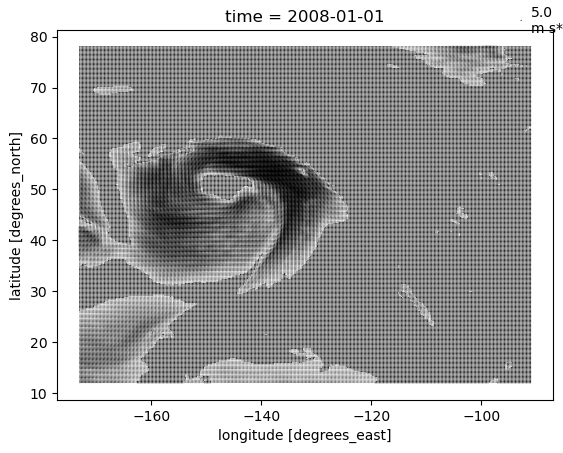

In [4]:
# Plot one time slice 
wind.isel(time=0).plot.quiver(x='longitude', y='latitude', u='u10', v='v10')

## Thinning all dimensions by the same factor 

Here, we keep every nth point across all dimensions.

In [5]:
n = 20
wind_thinned = eco.thin_dataset(wind, n_thin=n)
wind_thinned

<xarray.Dataset>
Dimensions:    (longitude: 17, latitude: 14, time: 440)
Coordinates:
  * longitude  (longitude) float32 -173.0 -168.0 -163.0 ... -103.0 -98.0 -93.0
  * latitude   (latitude) float32 78.0 73.0 68.0 63.0 ... 28.0 23.0 18.0 13.0
  * time       (time) datetime64[ns] 2008-01-01 ... 2008-12-31T20:00:00
Data variables:
    u10        (time, latitude, longitude) float32 0.7963 1.159 ... -7.4 -0.3785
    v10        (time, latitude, longitude) float32 5.058 3.698 ... -2.269 0.6049
    t2m        (time, latitude, longitude) float32 249.1 245.6 ... 300.4 300.6
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-14 00:45:00 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

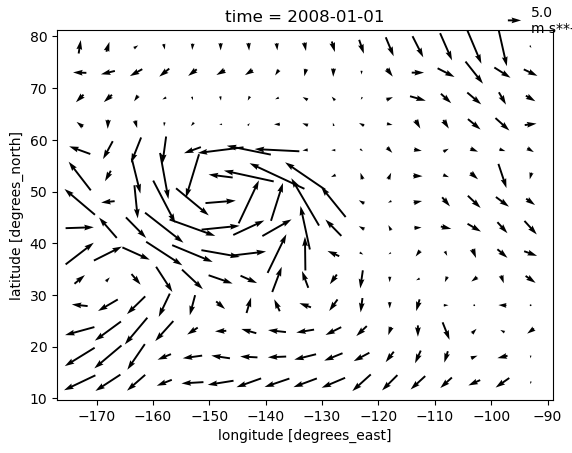

In [6]:
# Plot one time slice 
wind_thinned.isel(time=0).plot.quiver(x='longitude', y='latitude', u='u10', v='v10')

## Thinning dimensions by different amounts 

The thinning factor for each dimension can be controlled independently by passing a dictionary that contains keys for each dimension. Here, we keep every 5th point across the latitude and longitude dimensions, but every 10th point across the time dimension.

In [7]:
wind_thinned = eco.thin_dataset(wind, n_thin = {'time': 10, 'longitude': 5, 'latitude': 5})
wind_thinned

<xarray.Dataset>
Dimensions:    (longitude: 66, latitude: 53, time: 879)
Coordinates:
  * longitude  (longitude) float32 -173.0 -171.8 -170.5 ... -94.25 -93.0 -91.75
  * latitude   (latitude) float32 78.0 76.75 75.5 74.25 ... 15.5 14.25 13.0
  * time       (time) datetime64[ns] 2008-01-01 ... 2008-12-31T20:00:00
Data variables:
    u10        (time, latitude, longitude) float32 0.7963 0.8929 ... -0.7807
    v10        (time, latitude, longitude) float32 5.058 4.742 ... -0.03834
    t2m        (time, latitude, longitude) float32 249.1 248.3 ... 300.6 300.4
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-14 00:45:00 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

## Saving the thinned dataset 

The thinned dataset will be saved to a netcdf file if the outfile argument is provided.

In [8]:
outfile = "../../output/thinned_output.nc"
eco.thin_dataset(wind, n_thin=10, outfile=outfile)


<xarray.Dataset>
Dimensions:    (longitude: 33, latitude: 27, time: 879)
Coordinates:
  * longitude  (longitude) float32 -173.0 -170.5 -168.0 ... -98.0 -95.5 -93.0
  * latitude   (latitude) float32 78.0 75.5 73.0 70.5 ... 20.5 18.0 15.5 13.0
  * time       (time) datetime64[ns] 2008-01-01 ... 2008-12-31T20:00:00
Data variables:
    u10        (time, latitude, longitude) float32 0.7963 1.041 ... -0.3785
    v10        (time, latitude, longitude) float32 5.058 4.481 ... -5.771 0.6049
    t2m        (time, latitude, longitude) float32 249.1 247.6 ... 299.5 300.6
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-14 00:45:00 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...